In [1]:
using Pkg

In [2]:
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/git_repos/RandPedigreePCA/notebooks`


In [3]:
using Plots
using LinearAlgebra
using SparseArrays
using MatrixMarket
using DataFrames
using CSV
using BenchmarkTools
using Profile

In [4]:
pwd()

"/Users/hbecher/git_repos/RandPedigreePCA/notebooks"

In [10]:
labels = DataFrame(CSV.File("../datasets/popLabel50.csv")).x

7100-element PooledArrays.PooledVector{String3, UInt32, Vector{UInt32}}:
 "A"
 "A"
 "A"
 "A"
 "A"
 "A"
 "A"
 "A"
 "A"
 "A"
 ⋮
 "AB"
 "AB"
 "AB"
 "AB"
 "AB"
 "AB"
 "AB"
 "AB"
 "AB"

In [5]:
#Linv = MatrixMarket.mmread("../datasets/pedLInv50.mtx")
Linv = MatrixMarket.mmread("/Users/hbecher/temp/pedLInv.mtx")

1390097×1390097 SparseMatrixCSC{Float64, Int64} with 4103006 stored entries:
⎡⣵⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣷⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣗⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣵⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⣵⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⣑⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡗⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⣤⣵⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⣑⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣶⣷⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣀⣑⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣽⣷⠼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢻⡿⢡⠩⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡗⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢟⡟⠐⠀⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣶⣷⢄⠀⠀⠀⠀⠀⠀⎥
⎢⡜⣷⠆⠀⢘⡟⡟⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣷⢄⠀⠀⠀⠀⎥
⎢⡇⣿⡂⢰⠀⡇⢳⢿⣿⡯⡏⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣷⣄⠀⠀⎥
⎣⡀⣿⠀⠀⠀⠀⠀⠆⢿⡟⠻⢿⢿⣸⢿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⎦

In [12]:
# def my_rnd_svg_Linv(Li, nComp=2, nIter=0, nOv=5, random_matrix=None):

#     if random_matrix is None:
#         random_matrix = np.random.normal(size=(nComp+nOv, Li.shape[0])).T
#     Lit = Li.transpose().tocsr()
#     print(type(Li))
#     print(type(Lit))
#     #print("Li transpose done.")
#     #print(Lit.shape)
#     #smat = scipy.sparse.linalg.spsolve_triangular(Li, random_matrix, lower=True)
#     smat = scipy.sparse.linalg.spsolve(Li, random_matrix)
#     #print("Solve done.")
#     #print(smat.shape)
#     ro, _ = scipy.linalg.qr(smat, mode='economic')
    
    
#     print(type(ro))
#     for i in range(nIter):
#         #print("Iteration ", i)
#         #rn, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve_triangular(Lit, ro, lower=False, overwrite_A=True, overwrite_b=True), mode='economic')
#         rn, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve(Lit, ro), mode='economic')
        
#         #print("rn done")
#         #ro, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve_triangular(Li, rn, lower=True, overwrite_A=True, overwrite_b=True), mode='economic')
#         ro, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve(Li, rn), mode='economic')
#         #print("ro done")
    
#     #U, S, V = scipy.linalg.svd(scipy.sparse.linalg.spsolve_triangular(Lit, ro, lower=False,  overwrite_A=True, overwrite_b=True).transpose(), full_matrices=False)
#     U, S, V = scipy.linalg.svd(scipy.sparse.linalg.spsolve(Lit, ro).transpose(), full_matrices=False)
    
#     #print("SVD done.")
#     #print(U.shape)
#     return (ro @ U)[:,:nComp], S[:nComp], V[:nComp,:]


In [6]:
function my_rnd_svg_Linv(Li; nComp=2, nIter=0, nOv=5, random_matrix=nothing)

    if random_matrix == nothing
        random_matrix = randn(size(Li)[1], nComp+nOv)
    end
    Lit = Matrix(Li')

    smat = Li \ random_matrix
    ro = Matrix(LinearAlgebra.qr(smat).Q)
    
    for i in 1:nIter
        rn = Matrix(LinearAlgebra.qr(Lit \ ro).Q)
        ro = Matrix(LinearAlgebra.qr(Li \ rn).Q)
    end
    
    U, S, V = LinearAlgebra.svd((Lit \ ro)')
    
    return (ro * U)[:,1:nComp], S[1:nComp], V[1:nComp,:]
end

my_rnd_svg_Linv (generic function with 1 method)

In [7]:
#@profile u, s, v = my_rnd_svg_Linv(Linv, nIter=1)

In [8]:
#Profile.print()

In [9]:
#using ProfileView

In [10]:
#@profview u, s, v = my_rnd_svg_Linv(Linv, nIter=1)

In [11]:
#@benchmark u, s, v = my_rnd_svg_Linv(Linv, nIter=1)

In [ ]:
u, s, v = my_rnd_svg_Linv(Linv, nIter=1);

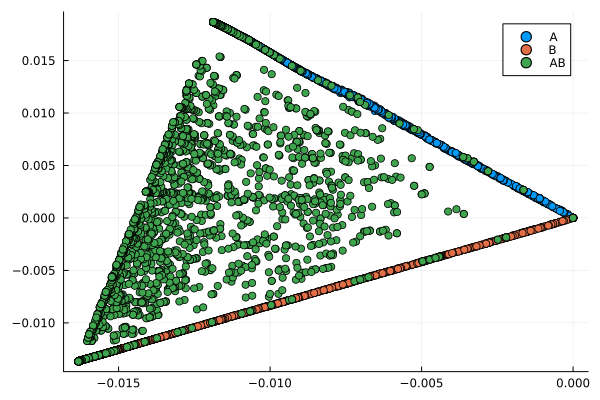

In [43]:
scatter(u[labels.=="A",1], u[labels.=="A",2], label="A")
scatter!(u[labels.=="B",1], u[labels.=="B",2], label="B")
scatter!(u[labels.=="AB",1], u[labels.=="AB",2], label="AB")